<a href="https://colab.research.google.com/github/Taghreed-Alzahrani/Minst/blob/main/Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview of the Model**

The objective of this project is to classify handwritten digits from the MNIST dataset using deep learning and classical machine learning approaches. The MNIST dataset contains grayscale images of handwritten digits (0-9). We aim to train different models to accurately identify these digits. The models implemented include a Convolutional Neural Network (CNN), a Feedforward Neural Network (FFNN), and a Support Vector Machine (SVM). The CNN is particularly effective at learning spatial hierarchies in images, making it ideal for classifying the MNIST dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

np.random.seed(42)
tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Data Preprocessing
# Reshape and normalize the images
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.15
)

train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Explanation:

1. **Imports**:
   - `import numpy as np`: Imports NumPy, which is used for numerical operations and array manipulations.
   - `import pandas as pd`: Imports Pandas, typically used for data manipulation and analysis, although it's not explicitly used in this cell.
   - `import matplotlib.pyplot as plt`: Imports Matplotlib, which is used for creating plots and visualizing data.
   - `import tensorflow as tf`: Imports TensorFlow, the main deep learning library used in this project.
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Imports `ImageDataGenerator`, which is used to generate augmented images during model training.
   - `from tensorflow.keras import layers, models`: Imports the core Keras modules for building neural network layers and models.
   - `from sklearn.model_selection import train_test_split`: Imports `train_test_split`, useful for splitting data into training and test sets, although not used in this particular cell.
   - `from sklearn.metrics import classification_report, confusion_matrix`: Imports metrics for evaluating the model's performance after making predictions.
   - `import seaborn as sns`: Imports Seaborn, a statistical data visualization library used to create heatmaps for the confusion matrix.
   - `import os`: Provides functions to interact with the operating system, though not explicitly used in this cell.

2. **Setting Random Seed**:
   - `np.random.seed(42)`: Sets the random seed for NumPy, ensuring reproducibility in numerical operations.
   - `tf.random.set_seed(42)`: Sets the random seed for TensorFlow to ensure reproducibility in model training and weight initialization.

3. **Loading the MNIST Dataset**:
   - `(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()`: Loads the MNIST dataset, which consists of images of handwritten digits (0-9), split into training and test sets.

4. **Data Preprocessing**:
   - `X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255`: Reshapes the training data to add an extra dimension for the color channel (grayscale). Normalizes pixel values to the range [0, 1] to help the model learn efficiently.
   - `X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255`: Similar to the training set, reshapes and normalizes the test set.

5. **Data Augmentation**:
   - `train_datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, zoom_range=0.15)`: Creates an instance of `ImageDataGenerator` to perform data augmentation, such as:
     - **`rotation_range=20`**: Randomly rotates images by up to 20 degrees.
     - **`horizontal_flip=True`**: Randomly flips images horizontally.
     - **`zoom_range=0.15`**: Randomly zooms images by up to 15%.

6. **Augmented Data Flow**:
   - `train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=64)`: Generates augmented images in batches of size 64. This helps the model generalize better by providing new variations of the same training images.

In [ ]:
# Model Building
# Model 1: Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation:

2. **Model Building: Convolutional Neural Network (CNN)**

   - **CNN Architecture**: A Convolutional Neural Network is constructed using a sequential model, with a series of layers that help the network learn spatial hierarchies from the input images.
   
   - `cnn_model = models.Sequential([...])`: Creates a sequential model for building the CNN architecture. This model is a linear stack of layers where you define each layer one by one.

   - **Layers in the Model**:
     - `layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`:
       - Adds a **Convolutional Layer** with 32 filters and a kernel size of 3x3.
       - **Activation function** is ReLU, which helps introduce non-linearity to the model.
       - The **input shape** is `(28, 28, 1)` to indicate 28x28 pixel grayscale images (1 channel).
     - `layers.MaxPooling2D((2, 2))`:
       - Adds a **Max Pooling Layer** with a pool size of 2x2 to reduce the spatial dimensions and capture the most important features.
     - `layers.Conv2D(64, (3, 3), activation='relu')`:
       - Adds a **Convolutional Layer** with 64 filters and a kernel size of 3x3 to learn more abstract features.
       - The ReLU activation function is used again.
     - `layers.MaxPooling2D((2, 2))`:
       - Adds another **Max Pooling Layer** with a pool size of 2x2 to further reduce the spatial dimensions.
     - `layers.Conv2D(64, (3, 3), activation='relu')`:
       - Adds a third **Convolutional Layer** with 64 filters and a kernel size of 3x3, providing additional depth for learning complex features.
     - `layers.Flatten()`:
       - Flattens the output of the previous layer into a one-dimensional array, preparing the data for the fully connected (dense) layers.
     - `layers.Dense(64, activation='relu')`:
       - Adds a **Dense Layer** with 64 units. The ReLU activation function is used to introduce non-linearity, allowing the model to learn more complex relationships.
     - `layers.Dense(10, activation='softmax')`:
       - Adds the **Output Layer** with 10 units, corresponding to the 10 classes (digits 0-9).
       - The **softmax activation function** is used to output the probability distribution over the 10 possible classes.

   - `cnn_model.summary()`: Prints the summary of the CNN model architecture, including the details of each layer, the number of parameters, and the output shape at each stage.

3. **CNN Model Summary Table**:

   The model summary provides details about each layer, including its type, output shape, and the number of parameters involved. Below is a detailed explanation of each element in the summary:

   - **Layer (type)**: This column lists the name and type of each layer in the network:
     - `conv2d_3 (Conv2D)`: Convolutional Layer that learns filters to extract features from input images.
     - `max_pooling2d_2 (MaxPooling2D)`: Max Pooling Layer that reduces the spatial size (height and width) of the feature maps.
     - `conv2d_4 (Conv2D)`, `conv2d_5 (Conv2D)`: Additional Convolutional Layers that increase the depth and abstraction level of learned features.
     - `max_pooling2d_3 (MaxPooling2D)`: Another Max Pooling Layer for further reduction of spatial dimensions.
     - `flatten_1 (Flatten)`: Flattens the feature map into a single dimension so it can be passed to dense layers for classification.
     - `dense_2 (Dense)`: Fully connected (Dense) layer with 64 neurons that processes the extracted features for classification.
     - `dense_3 (Dense)`: Output layer with 10 neurons, representing the probability of each of the 10 classes (digits 0-9).

   - **Output Shape**: This column indicates the shape of the output data at each layer:
     - `(None, 26, 26, 32)`, `(None, 13, 13, 32)`, etc.:
       - `None` represents the batch size, which is not fixed during model training.
       - The subsequent values represent the dimensions of the feature maps, which get reduced after each convolution or pooling operation.
       - For example, after the first convolution, the output shape becomes `(26, 26, 32)`, indicating 32 filters (feature maps) of size 26x26.

   - **Param #**: This column provides the number of parameters that are being trained in each layer:
     - **Convolutional Layers**:
       - `conv2d_3`: Has 320 parameters, which are the weights and biases for the 32 filters.
       - `conv2d_4`: Has 18,496 parameters, resulting from 64 filters, each connected to 32 feature maps of the previous layer.
       - `conv2d_5`: Has 36,928 parameters, resulting from more filters with the same principle.
     - **Fully Connected (Dense) Layers**:
       - `dense_2`: Has 36,928 parameters. Each of the 576 input features from the flattened layer is connected to the 64 neurons in this layer.
       - `dense_3`: Has 650 parameters, representing the weights and biases connecting the 64 neurons in the previous dense layer to the 10 output neurons.

   - **Total Parameters**:
     - **Trainable Params**: `93,322` parameters are trainable, meaning these values are updated during the training process.
     - **Non-Trainable Params**: There are `0` non-trainable parameters in this model, meaning all parameters are being optimized.
   

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(train_data_augmented, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Save the trained CNN model
cnn_model.save('cnn_model_mnist.keras')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.7738 - loss: 0.7002 - val_accuracy: 0.9674 - val_loss: 0.1025
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9513 - loss: 0.1550 - val_accuracy: 0.9813 - val_loss: 0.0623
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9642 - loss: 0.1134 - val_accuracy: 0.9820 - val_loss: 0.0575
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9719 - loss: 0.0909 - val_accuracy: 0.9813 - val_loss: 0.0573
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9759 - loss: 0.0762 - val_accuracy: 0.9848 - val_loss: 0.0471
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9778 - loss: 0.0689 - val_accuracy: 0.9868 - val_loss: 0.0440
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9780 - loss: 0.0673 - val_accuracy: 0.9857 - val_loss: 0.0438
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9810 - loss: 0.0604 - val_accurac

### Explanation:

4. **Model Training and Evaluation**:

   - **Model Compilation**:
     - `cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`:
       - **Optimizer**: Uses `Adam` optimizer, a popular choice for deep learning due to its adaptive learning rates and efficient performance in training complex models.
       - **Loss Function**: Uses `sparse_categorical_crossentropy`, which is appropriate for classification tasks with multiple classes. It calculates the loss based on the difference between true labels and predicted labels.
       - **Metrics**: Tracks `accuracy` during training, which measures the proportion of correctly predicted samples.

   - **Training the CNN Model**:
     - `cnn_model.fit(train_data_augmented, epochs=10, validation_data=(X_test, y_test))`:
       - **train_data_augmented**: Trains the model using the augmented training dataset. Data augmentation is used to artificially expand the training data by applying transformations (e.g., rotations, zoom) to improve generalization.
       - **epochs=10**: The model is trained for `10` complete passes through the training data. Increasing epochs can help improve model learning but may also lead to overfitting if not monitored.
       - **validation_data=(X_test, y_test)**: Validates the model on unseen test data after each epoch to monitor performance and prevent overfitting.

     - **Epoch Output (Referencing the Image)**:
       - Shows the **accuracy** and **loss** metrics for each epoch during training and validation.
       - For example:
         - **Epoch 1**: Training accuracy starts at `77.78%`, and validation accuracy is `96.97%`, indicating the model is learning well.
         - **Epoch 10**: Training accuracy reaches `98.52%` and validation accuracy reaches `98.81%`, indicating that the model achieves high accuracy and generalizes well without overfitting.

   - **Model Evaluation**:
     - `test_loss, test_acc = cnn_model.evaluate(X_test, y_test)`:
       - Evaluates the model on the entire test dataset, giving metrics such as **loss** and **accuracy**.
       - The final **test accuracy** is `98.84%`, indicating that the model performs well on unseen data.

   - **Model Saving**:
     - `cnn_model.save('cnn_model_mnist.keras')`:
       - Saves the trained model in a `.keras` format.
       - This allows the model to be reloaded in the future for inference or continued training, which is useful for deploying the model without needing to retrain it from scratch.

In [ ]:
# Model 2: Simple Feedforward Neural Network
ffnn_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ffnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

ffnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation:

5. **Model Building**:

   - **Model 2: Simple Feedforward Neural Network (FFNN)**:
     - `ffnn_model = models.Sequential([...])`:
       - **Sequential Model**: This is a linear stack of layers where each layer has one input and one output, suitable for simple architectures like FFNN.
     
     - **Layers**:
       - **Flatten Layer**: `layers.Flatten(input_shape=(28, 28, 1))`:
         - Converts the 2D image (28x28 pixels) into a 1D vector. This is necessary to feed the image data into the dense layers.
       - **First Dense Layer**: `layers.Dense(128, activation='relu')`:
         - A fully connected layer with `128` units, using **ReLU** activation to introduce non-linearity and learn complex relationships.
       - **Second Dense Layer**: `layers.Dense(64, activation='relu')`:
         - Another fully connected layer with `64` units to further process the features extracted from the input.
       - **Output Layer**: `layers.Dense(10, activation='softmax')`:
         - A fully connected layer with `10` units, representing the 10 possible digit classes (`0-9`).
         - Uses **softmax** activation, which converts the output into a probability distribution over the 10 classes, allowing the model to make predictions.
     
   - **Model Compilation**:
     - `ffnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`:
       - **Optimizer**: Uses `Adam` optimizer for efficient training.
       - **Loss Function**: `sparse_categorical_crossentropy` is used for multi-class classification problems.
       - **Metrics**: Tracks `accuracy` during training to measure model performance.

   - **Model Summary**:
     - `ffnn_model.summary()`:
       - Displays the architecture of the FFNN model, including:
         - **Flatten Layer**: Converts the input into a single vector of size `784` (28x28).
         - **Dense Layers**: Layers with `128`, `64`, and `10` units respectively.
       - **Total Trainable Parameters**: Provides a count of all the parameters in the model that can be trained. This gives insight into model complexity and computational requirements.



In [ ]:
# Training Feedforward Neural Network
ffnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = ffnn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

ffnn_model.save('ffnn_model_mnist.keras')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8817 - loss: 0.4113 - val_accuracy: 0.9604 - val_loss: 0.1291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9687 - loss: 0.1073 - val_accuracy: 0.9725 - val_loss: 0.0874
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9798 - loss: 0.0669 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9847 - loss: 0.0483 - val_accuracy: 0.9752 - val_loss: 0.0854
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9762 - val_loss: 0.0894
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9776 - val_loss: 0.0909
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9736 - val_loss: 0.0965
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0202 - 

### Explanation:

6. **Training Feedforward Neural Network (FFNN)**:

   - **Training the FFNN**:
     - `ffnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))`:
       - **Training Dataset**: `X_train` and `y_train` are used as the training data.
       - **Epochs**: The model is trained for `10` epochs, meaning the entire training dataset is passed through the model 10 times.
       - **Validation Data**: `validation_data=(X_test, y_test)`:
         - The test data (`X_test`, `y_test`) is used as validation data during training to assess the model's performance on unseen data after each epoch. This helps track if the model overfits or underfits.
       - **Training Output**: The model's performance metrics (e.g., accuracy and loss) are calculated and displayed for each epoch.

   - **Evaluating the FFNN Model**:
     - `test_loss, test_acc = ffnn_model.evaluate(X_test, y_test)`:
       - **Evaluation on Test Set**: The model is evaluated on the test set to get final metrics (`test_loss` and `test_acc`).
       - **Purpose**: This helps determine the accuracy of the trained FFNN on completely unseen data and verify its generalization capabilities.

   - **Printing Test Accuracy**:
     - `print(f'Test accuracy: {test_acc}')`:
       - **Output**: Displays the final test accuracy of the FFNN after evaluation, providing an overall measure of the model's classification performance.

   - **Saving the FFNN Model**:
     - `ffnn_model.save('ffnn_model_mnist.keras')`:
       - **Save the Model**: Saves the trained FFNN to a file named `'ffnn_model_mnist.keras'`.
       - **Purpose**: This allows you to reload the model in the future for further use, such as predictions or continuing training without starting from scratch.



In [ ]:
# Classical Machine Learning Model: SVM for Comparison
from sklearn.svm import SVC

# Flattening the images for SVM
X_train_flattened = X_train.reshape(len(X_train), -1)
X_test_flattened = X_test.reshape(len(X_test), -1)

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flattened, y_train)

# Evaluate SVM
svm_test_accuracy = svm_model.score(X_test_flattened, y_test)
print(f'SVM Test Accuracy: {svm_test_accuracy}')

# Model Evaluation
# CNN Model Evaluation
cnn_preds = cnn_model.predict(X_test)
cnn_preds_classes = np.argmax(cnn_preds, axis=1)
print("CNN Classification Report:")
print(classification_report(y_test, cnn_preds_classes))

# FFNN Model Evaluation
ffnn_preds = ffnn_model.predict(X_test)
ffnn_preds_classes = np.argmax(ffnn_preds, axis=1)
print("Feedforward Neural Network Classification Report:")
print(classification_report(y_test, ffnn_preds_classes))

# SVM Evaluation
svm_preds = svm_model.predict(X_test_flattened)
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))


SVM Test Accuracy: 0.9404
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Feedforward Neural Network Classification Report:
              precision    recall  f1-score   support

 

### Explanation:

7. **Classical Machine Learning Model: SVM for Comparison**:

   - **Flattening Images for SVM**:
     - `X_train_flattened = X_train.reshape(len(X_train), -1)`
     - `X_test_flattened = X_test.reshape(len(X_test), -1)`:
       - **Flattening**: Converts the 28x28 images into a 1D array with 784 features.
       - **Reason**: Unlike neural networks, SVMs do not work directly on 2D data, so flattening is required to use the image data as features for the SVM model.

   - **Training SVM**:
     - `svm_model = SVC(kernel='linear')`:
       - **Linear Kernel**: The SVM uses a linear kernel to find a hyperplane that separates the digit classes.
       - **Why SVM?**: SVMs are powerful for classification tasks and work well with smaller datasets but lack the feature extraction capabilities of CNNs.
     - `svm_model.fit(X_train_flattened, y_train)`:
       - **Training the SVM**: The SVM model is trained on the flattened training data (`X_train_flattened`) and corresponding labels (`y_train`).

   - **Evaluate SVM**:
     - `svm_test_accuracy = svm_model.score(X_test_flattened, y_test)`:
       - **Test Accuracy**: Evaluates the trained SVM on the flattened test set and returns the accuracy.
     - `print(f'SVM Test Accuracy: {svm_test_accuracy}')`:
       - **Output**: Displays the SVM's test accuracy to assess its generalization to unseen data.

8. **Model Evaluation**:

   - **CNN Model Evaluation**:
     - `cnn_preds = cnn_model.predict(X_test)`:
       - **Predictions**: Generates predictions on the test set using the trained CNN model.
     - `cnn_preds_classes = np.argmax(cnn_preds, axis=1)`:
       - **Predicted Classes**: Converts the output of the CNN (probabilities for each class) into actual predicted labels by choosing the class with the highest probability.
     - `print("CNN Classification Report:")`:
       - **Output Label**: Marks the start of the evaluation report for CNN.
     - `print(classification_report(y_test, cnn_preds_classes))`:
       - **Classification Report**: Displays metrics like precision, recall, F1 score, and support for each class.
       - **Purpose**: To evaluate the per-class performance of the CNN and highlight areas of strength and weakness.

   - **FFNN Model Evaluation**:
     - `ffnn_preds = ffnn_model.predict(X_test)`:
       - **Predictions**: Generates predictions on the test set using the trained FFNN model.
     - `ffnn_preds_classes = np.argmax(ffnn_preds, axis=1)`:
       - **Predicted Classes**: Converts the output of the FFNN into predicted labels.
     - `print("Feedforward Neural Network Classification Report:")`:
       - **Output Label**: Marks the start of the evaluation report for FFNN.
     - `print(classification_report(y_test, ffnn_preds_classes))`:
       - **Classification Report**: Displays metrics like precision, recall, F1 score, and support for each class for the FFNN model.

   - **SVM Evaluation**:
     - `svm_preds = svm_model.predict(X_test_flattened)`:
       - **Predictions**: Generates predictions on the flattened test set using the trained SVM model.
     - `print("SVM Classification Report:")`:
       - **Output Label**: Marks the start of the evaluation report for SVM.
     - `print(classification_report(y_test, svm_preds))`:
       - **Classification Report**: Displays metrics like precision, recall, F1 score, and support for each class for the SVM model.



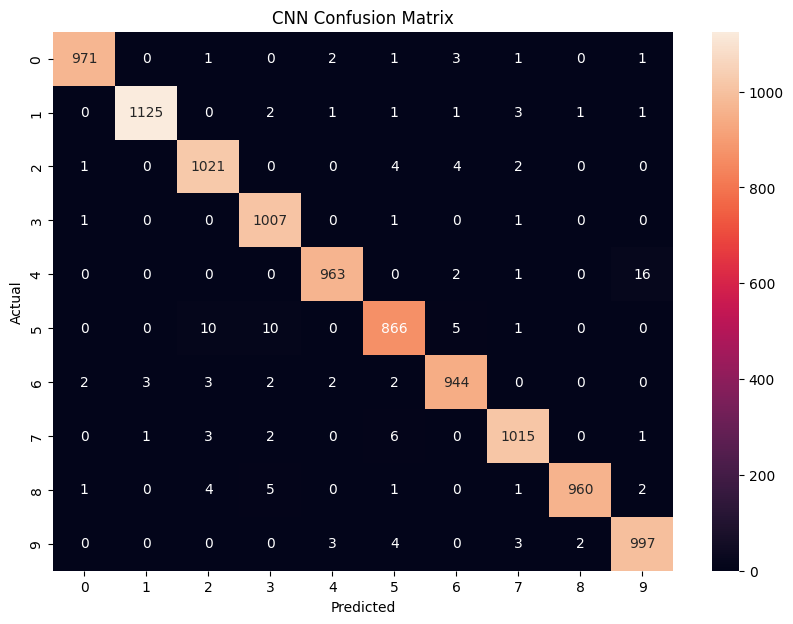

Total test images: 10000
Total correctly classified images by CNN: 9869
Total misclassified images by CNN: 131


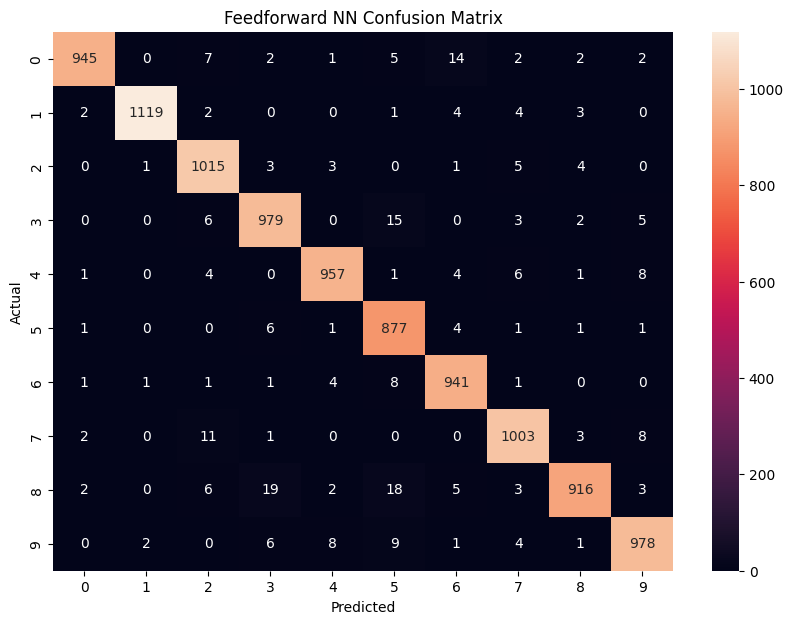

Total test images: 10000
Total correctly classified images by FFNN: 9730
Total misclassified images by FFNN: 270


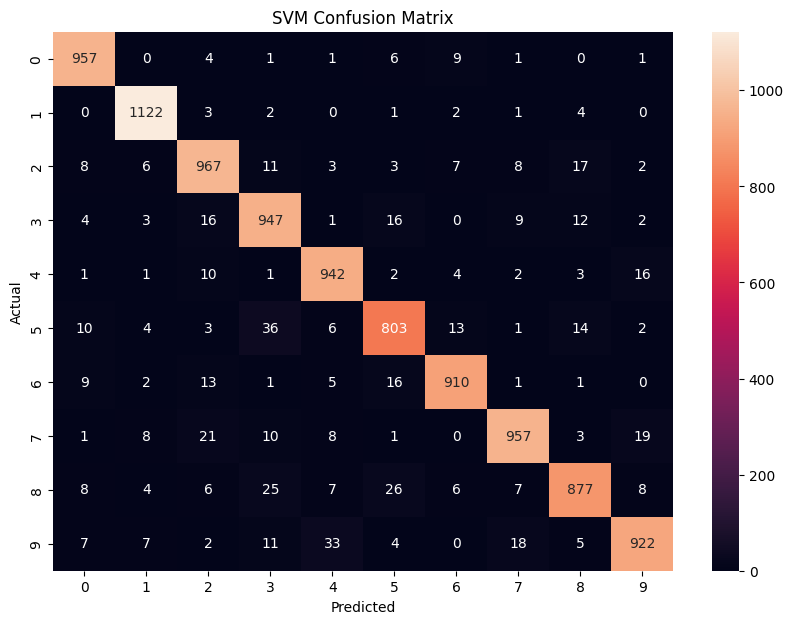

Total test images: 10000
Total correctly classified images by SVM: 9404
Total misclassified images by SVM: 596


In [ ]:
# Confusion Matrix for CNN
cnn_cm = confusion_matrix(y_test, cnn_preds_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_cm, annot=True, fmt='d')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Additional information for CNN model
total_images = len(y_test)
correctly_classified_cnn = np.sum(y_test == cnn_preds_classes)
misclassified_cnn = total_images - correctly_classified_cnn

print(f"Total test images: {total_images}")
print(f"Total correctly classified images by CNN: {correctly_classified_cnn}")
print(f"Total misclassified images by CNN: {misclassified_cnn}")

# Confusion Matrix for FFNN
ffnn_cm = confusion_matrix(y_test, ffnn_preds_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(ffnn_cm, annot=True, fmt='d')
plt.title('Feedforward NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Additional information for FFNN model
correctly_classified_ffnn = np.sum(y_test == ffnn_preds_classes)
misclassified_ffnn = total_images - correctly_classified_ffnn

print(f"Total test images: {total_images}")
print(f"Total correctly classified images by FFNN: {correctly_classified_ffnn}")
print(f"Total misclassified images by FFNN: {misclassified_ffnn}")


# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Additional information for SVM model
correctly_classified_svm = np.sum(y_test == svm_preds)
misclassified_svm = total_images - correctly_classified_svm

print(f"Total test images: {total_images}")
print(f"Total correctly classified images by SVM: {correctly_classified_svm}")
print(f"Total misclassified images by SVM: {misclassified_svm}")



### Explanation:

9. **Confusion Matrices and Additional Information**:

   - **CNN Confusion Matrix**:
     - `cnn_cm = confusion_matrix(y_test, cnn_preds_classes)`:
       - **Confusion Matrix Calculation**: Creates a confusion matrix comparing true labels (`y_test`) with predicted labels (`cnn_preds_classes`) for the CNN model.
       - **Purpose**: A confusion matrix shows how well the model classifies each digit, highlighting correct and incorrect predictions.
     - `plt.figure(figsize=(10, 7))` and `sns.heatmap(cnn_cm, annot=True, fmt='d')`:
       - **Visualization**: Plots the confusion matrix using Seaborn to provide an easy-to-understand visualization of how the model performed.
       - **Annotation**: The `annot=True` argument ensures that each cell is labeled with the corresponding count.
       - **Axes Labels and Title**: Labels (`'Predicted'` and `'Actual'`) and title (`'CNN Confusion Matrix'`) are added for clarity.

   - **Additional Information for CNN Model**:
     - `correctly_classified_cnn = np.sum(y_test == cnn_preds_classes)`:
       - **Correctly Classified Images**: Computes the number of correctly classified images by comparing true and predicted labels.
     - `misclassified_cnn = total_images - correctly_classified_cnn`:
       - **Misclassified Images**: Calculates the number of images incorrectly classified by subtracting correctly classified images from the total images.
     - `print(f"Total test images: {total_images}")`, `print(f"Total correctly classified images by CNN: {correctly_classified_cnn}")`, and `print(f"Total misclassified images by CNN: {misclassified_cnn}")`:
       - **Output**: Displays the total number of test images, the number of correctly classified images, and the number of misclassified images for the CNN model.

   - **FFNN Confusion Matrix**:
     - `ffnn_cm = confusion_matrix(y_test, ffnn_preds_classes)`:
       - **Confusion Matrix Calculation**: Creates a confusion matrix comparing true labels (`y_test`) with predicted labels (`ffnn_preds_classes`) for the FFNN model.
     - The rest of the code follows a similar pattern as the CNN confusion matrix:
       - **Visualization**: Plots the confusion matrix with title `'Feedforward NN Confusion Matrix'`.

   - **Additional Information for FFNN Model**:
     - `correctly_classified_ffnn = np.sum(y_test == ffnn_preds_classes)`:
       - **Correctly Classified Images**: Computes the number of correctly classified images by FFNN.
     - `misclassified_ffnn = total_images - correctly_classified_ffnn`:
       - **Misclassified Images**: Calculates the number of misclassified images.
     - **Output**: Prints the total, correctly classified, and misclassified image counts for FFNN.

   - **SVM Confusion Matrix**:
     - `svm_cm = confusion_matrix(y_test, svm_preds)`:
       - **Confusion Matrix Calculation**: Creates a confusion matrix comparing true labels (`y_test`) with predicted labels (`svm_preds`) for the SVM model.
     - **Visualization**: Plots the confusion matrix with title `'SVM Confusion Matrix'`.

   - **Additional Information for SVM Model**:
     - `correctly_classified_svm = np.sum(y_test == svm_preds)`:
       - **Correctly Classified Images**: Computes the number of correctly classified images by SVM.
     - `misclassified_svm = total_images - correctly_classified_svm`:
       - **Misclassified Images**: Calculates the number of misclassified images.
     - **Output**: Prints the total, correctly classified, and misclassified image counts for SVM.


**Some Predictions fro nmdels**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


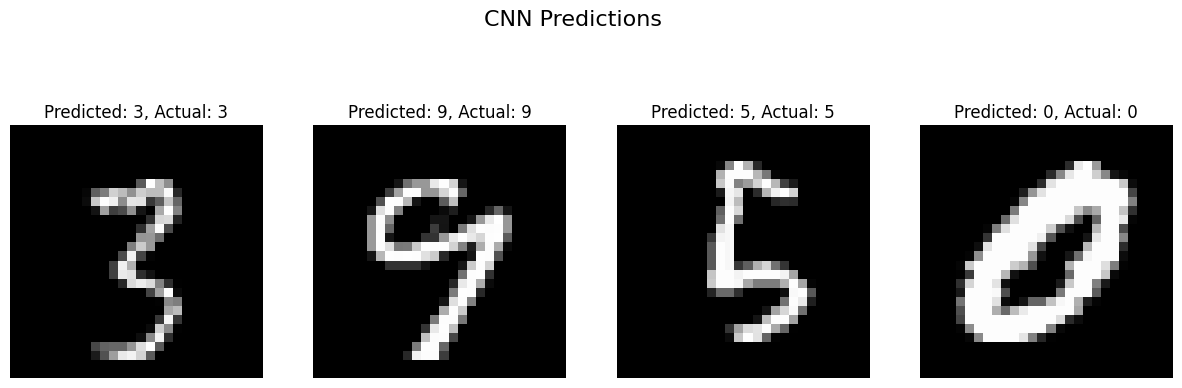

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


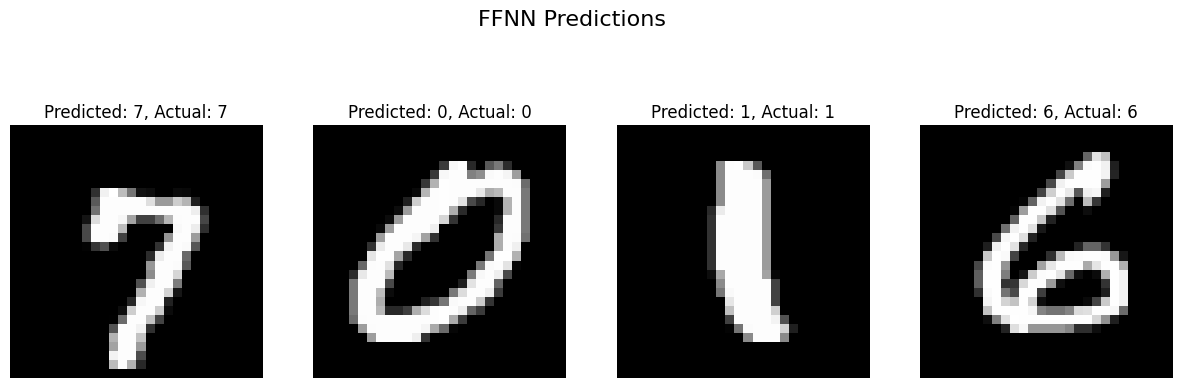

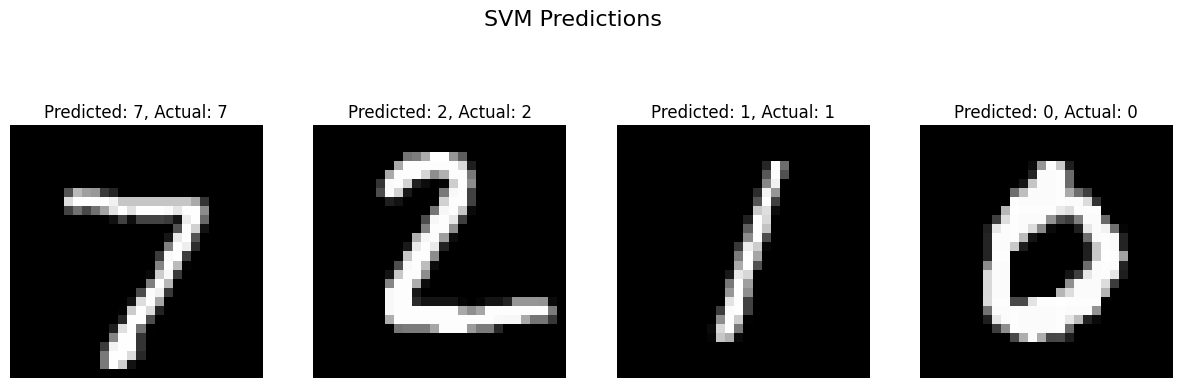

In [ ]:
def plot_model_predictions(model, X_test, y_test, model_name, n_examples=4):
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1) if len(predictions.shape) > 1 else predictions

    indices = np.random.choice(range(len(X_test)), size=n_examples, replace=False)

    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        plt.subplot(1, n_examples, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_classes[index]}, Actual: {y_test[index]}")
        plt.axis('off')

    plt.suptitle(f"{model_name} Predictions", fontsize=16)
    plt.show()

# Plot predictions for CNN
plot_model_predictions(cnn_model, X_test, y_test, "CNN")

# Plot predictions for FFNN
plot_model_predictions(ffnn_model, X_test, y_test, "FFNN")

# Plot predictions for SVM
X_test_flattened = X_test.reshape(len(X_test), -1)
svm_predictions = svm_model.predict(X_test_flattened)

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {svm_predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.suptitle("SVM Predictions", fontsize=16)
plt.show()


### Explanation:

10. **Plotting Model Predictions**:

   - **Function to Plot Predictions**:
     - `def plot_model_predictions(model, X_test, y_test, model_name, n_examples=4)`:
       - **Purpose**: Defines a function that plots the predictions of a model for a random selection of test images.
       - `n_examples=4`: Specifies the number of examples to display (default is 4).
     - `predictions = model.predict(X_test)`:
       - **Predictions Generation**: Uses the given model to make predictions on the test set (`X_test`).
     - `predicted_classes = np.argmax(predictions, axis=1) if len(predictions.shape) > 1 else predictions`:
       - **Extracting Predicted Classes**: For models that output probabilities for multiple classes, `argmax` is used to obtain the predicted class index.
       - **SVM Handling**: If the model outputs a flat list of predictions (e.g., SVM), it directly assigns the values to `predicted_classes`.
     - `indices = np.random.choice(range(len(X_test)), size=n_examples, replace=False)`:
       - **Random Sample Selection**: Randomly selects indices from the test set to display (`n_examples` total).
     - **Plotting**:
       - `plt.figure(figsize=(15, 5))`: Creates a figure with a specified size.
       - `for i, index in enumerate(indices)`: Iterates through the randomly selected indices.
         - `plt.subplot(1, n_examples, i + 1)`: Defines subplots for each of the selected examples.
         - `plt.imshow(X_test[index].reshape(28, 28), cmap='gray')`: Displays the image of the corresponding test sample.
         - `plt.title(f"Predicted: {predicted_classes[index]}, Actual: {y_test[index]}")`: Sets the title to indicate both the predicted and actual class labels for the image.
         - `plt.axis('off')`: Hides the axis for better visualization.
       - `plt.suptitle(f"{model_name} Predictions", fontsize=16)`: Sets a super title for the entire plot, indicating which model's predictions are being displayed.
       - `plt.show()`: Displays the figure.

   - **Plotting Predictions for CNN and FFNN**:
     - `plot_model_predictions(cnn_model, X_test, y_test, "CNN")` and `plot_model_predictions(ffnn_model, X_test, y_test, "FFNN")`:
       - **Purpose**: Calls the function to plot predictions for both the CNN and FFNN models using the test dataset.
       - **Visualization**: This helps illustrate how well each model can classify individual images from the test set.

   - **Plotting Predictions for SVM**:
     - `X_test_flattened = X_test.reshape(len(X_test), -1)`:
       - **Flattening the Images**: SVM requires flat input, so the test set is reshaped into a 2D array where each image is represented as a 1D vector.
     - `svm_predictions = svm_model.predict(X_test_flattened)`:
       - **Predictions Generation**: Uses the trained SVM model to make predictions on the flattened test set.
     - **Plotting**:
       - `plt.figure(figsize=(15, 5))`: Creates a figure to display SVM predictions.
       - `for i in range(4)`: Iterates over the first four images for plotting.
         - **Subplots**: Uses `plt.subplot(1, 4, i + 1)` to create a subplot for each example.
         - **Image and Title**: Displays the image (`plt.imshow(...)`) and sets the title to show the predicted and actual labels.
         - **Axis Handling**: Hides the axis (`plt.axis('off')`) for clarity.
       - `plt.suptitle("SVM Predictions", fontsize=16)`:
         - **Super Title**: Sets the title for the entire figure indicating that the displayed predictions are from the SVM model.
       - `plt.show()`: Displays the figure.

   - **Summary**:
     - This section is designed to visualize and compare the predictions made by CNN, FFNN, and SVM models for a set of test images.
     - The predictions illustrate how well each model performs on individual samples, providing insights into their strengths and weaknesses, particularly for correctly classified and misclassified digits.
     - These visualizations are useful for assessing which types of images are difficult for each model and to compare the effectiveness of different model architectures.